## Imports

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
import h5py
import pandas as pd

2023-04-28 18:31:54.731610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 18:31:54.764291: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 18:31:54.764649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 18:31:55.383079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


---
## Go and read in the images and label in labels.csv

In [2]:
mydata = np.load('mynumber.npz')

In [3]:
type(mydata)

numpy.lib.npyio.NpzFile

In [4]:
mydata.files

['images', 'labels']

In [5]:
mydata['images'].shape

(5, 28, 28)

In [6]:
mydata['labels'].shape

(5,)

---
## Load my AI model

In [7]:
model = tf.keras.models.load_model('handwriting_model.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
None


---
### noramlize the data

In [8]:
images = mydata['images']/255

---
## make predictions

In [9]:
all_predictions = model.predict(images)

1/1 [==============================] - 0s 67ms/step


In [10]:
all_predictions[0]

array([6.14725635e-04, 4.19073156e-04, 5.69336079e-02, 1.09950786e-04,
       2.21676648e-01, 6.25043094e-01, 5.79789057e-02, 4.97546629e-04,
       3.22773233e-02, 4.44917986e-03], dtype=float32)

In [11]:
test_loss,test_acc = model.evaluate(images,mydata['labels'],verbose = 1)
print('\nTest Accuracy:', test_acc *100, "%")

1/1 [==============================] - 0s 99ms/step - loss: 3.2197 - accuracy: 0.6000

Test Accuracy: 60.00000238418579 %


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [12]:
wrong = []
for i in range(len(all_predictions)):
    print(np.argmax(all_predictions[i]), mydata['labels'][i])
       ## wrong.append(i)

#print(wrong)
#print(len(wrong))
#print("percentage wrong", len(wrong)/len(images)*100, '%')

5 3
9 9
4 4
6 6
1 8


In [13]:
def plot_classified_image(ax, img, label, classification):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted = np.argmax(classification)
    if predicted == label:
        color = 'black'
    else:
        color = 'r'

    plt.xlabel("Predicted : {}  Confidence : {:2.0f}  Actual : {}".format(predicted, np.max(classification), label), color=color)
    # plt.xlabel("[zzzzz]")
    return ax

In [14]:
# may need to fix this when we have labels for the category names
def plot_prediction(ax, label, prediction):
    number_of_classes = len(prediction)
    x_values = np.arange(number_of_classes)
    predicted = np.argmax(prediction)
    ax.bar(x_values,prediction, alpha=0.75)
    ax.bar(predicted, prediction[predicted], color='r', label='prediction')
    ax.bar(label,prediction[label], color='g', label='actual')
    ax.set_xticks(x_values)
    ax.set_xlabel('Number')
    ax.set_ylabel('Porbability')
    ax.legend()

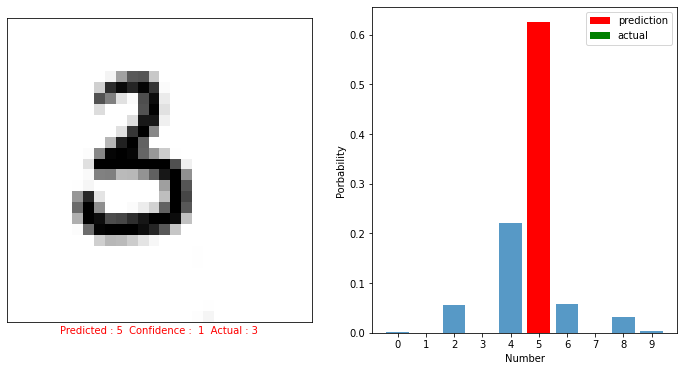

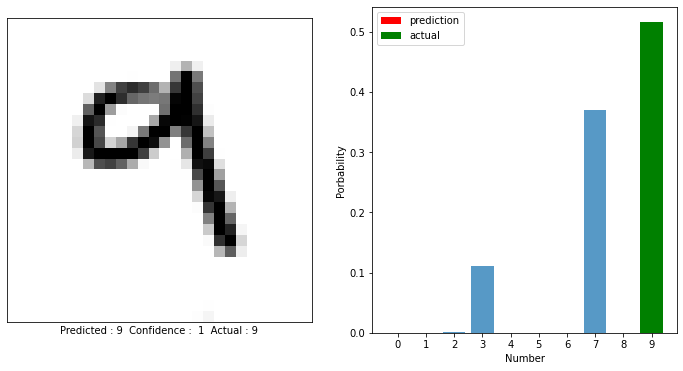

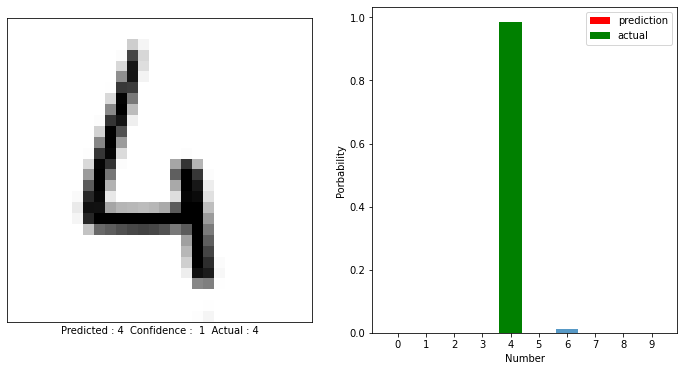

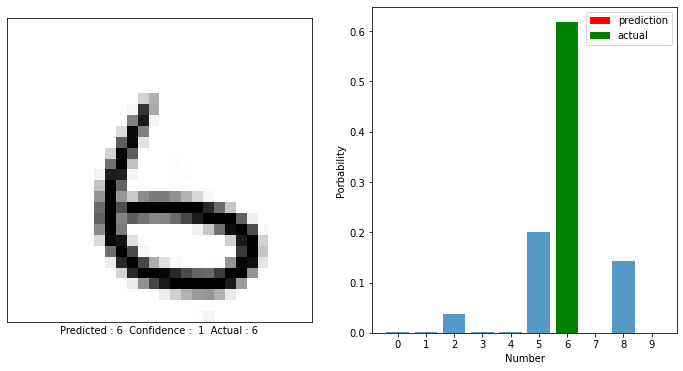

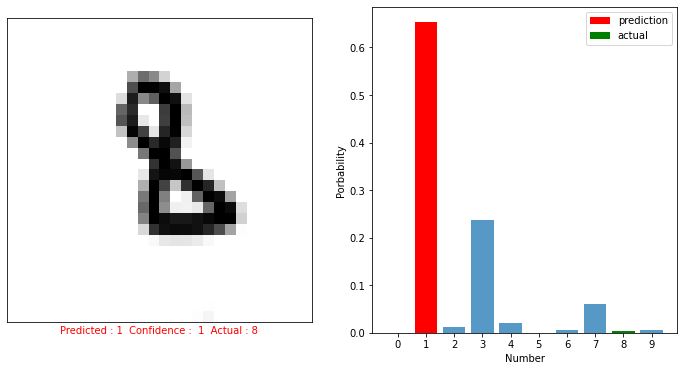

In [29]:
for i in range(len(all_predictions)):
    obs = i
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    plot_classified_image(plt.subplot(1,2,1), images[obs], mydata['labels'][obs], all_predictions[obs])
    plot_prediction(plt.subplot(1,2,2), mydata['labels'][obs], all_predictions[obs])
    plt.show()